In [7]:
import sys
sys.path.append('..')

In [8]:
from hyppo.independence import MGC

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from tools.FeatureSelector import feature_selection

## 1.PS

In [3]:
ps=np.load('../dataset/CMB_data/ps.npy')[:,1:]
param=np.load('../dataset/CMB_data/param.npy')

In [4]:
ps = (ps - np.mean(ps, axis=0)) / np.std(ps, axis=0)

param = 2 * ((param - np.min(param, axis=0)) /
             (np.max(param, axis=0) - np.min(param, axis=0)) - 1 / 2)

In [5]:
MGC().statistic(ps, param)

0.6363783377117477

In [10]:
mask = feature_selection(ps, param)
ps_mask = ps[:, mask]

In [11]:
MGC().statistic(ps_mask, param)

0.6653026350262373

## 2.BS

In [12]:
bs=np.load('../dataset/CMB_data/bs.npy')[:,1:]
param=np.load('../dataset/CMB_data/param.npy')

In [13]:
bs=(bs-np.mean(bs,axis=0))/np.std(bs,axis=0)
param=2*((param-np.min(param,axis=0))/(np.max(param,axis=0)-np.min(param,axis=0))-1/2)

In [14]:
MGC().statistic(bs, param)

0.00171201639497075

In [15]:
mask = feature_selection(bs, param)
bs_mask = bs[:, mask]

In [16]:
MGC().statistic(bs_mask, param)

0.0028387222107269902

## 3.PS&BS

In [17]:
ps = np.load('../dataset/CMB_data/ps.npy')[:, 1:]
bs = np.load('../dataset/CMB_data/bs.npy')[:, 1:]
pb = np.hstack([ps, bs])
param = np.load('../dataset/CMB_data/param.npy')

In [18]:
pb = (pb - np.mean(pb, axis=0)) / np.std(pb, axis=0)
param = 2 * ((param - np.min(param, axis=0)) /
             (np.max(param, axis=0) - np.min(param, axis=0)) - 1 / 2)

In [19]:
MGC().statistic(pb, param)

0.5554388103946328

In [20]:
mask = feature_selection(pb, param)
pb_mask = pb[:, mask]

In [21]:
MGC().statistic(pb_mask, param)

0.6653026350262373

## 4.ST

In [22]:
st = np.load('../dataset/CMB_data/st.npy')
param = np.load('../dataset/CMB_data/param.npy')

In [23]:
st = (st - np.mean(st, axis=0)) / np.std(st, axis=0)
param = 2 * ((param - np.min(param, axis=0)) /
             (np.max(param, axis=0) - np.min(param, axis=0)) - 1 / 2)

In [24]:
MGC().statistic(st, param)

0.576369942259054

In [25]:
mask = feature_selection(st, param)
st_mask = st[:, mask]

In [26]:
MGC().statistic(st_mask, param)

0.6378870002246059

## Plot

In [29]:
re_all_pure = [{
    'ps': 0.6363783377117477,
    'ps&bs': 0.5554388103946328,
    'st': 0.576369942259054,
    'bs': 0.00171201639497075,
}]

re_all_fs = [{
    'ps': 0.6653026350262373,
    'ps&bs': 0.6653026350262373,
    'st': 0.6378870002246059,
    'bs': 0.0028387222107269902,
}]

In [31]:
from tools.Ploter import plot_compare_bar
import matplotlib.patches as mpatches

(0.0, 0.7)

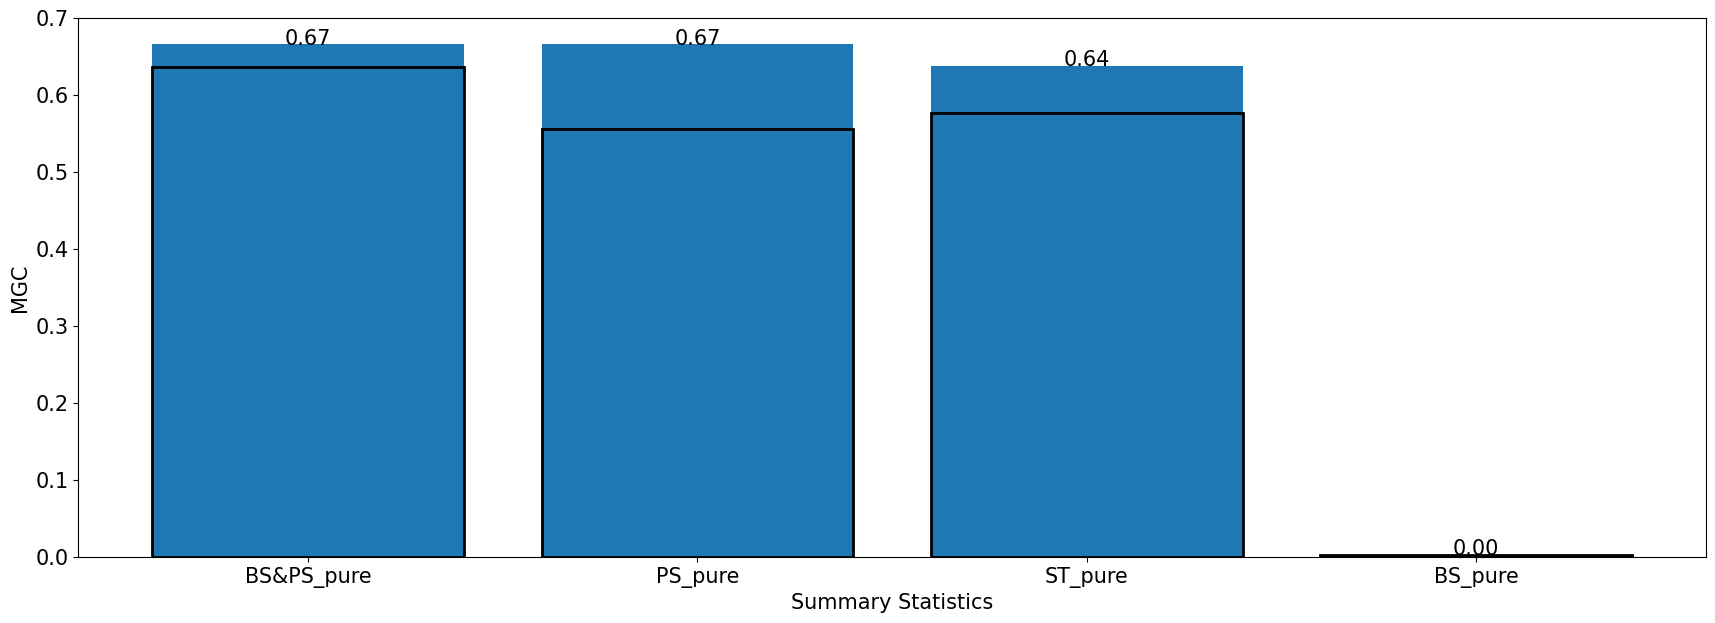

In [34]:
values_all = [
    re_all_pure[0]['ps'], re_all_pure[0]['ps&bs'], re_all_pure[0]['st'],
    re_all_pure[0]['bs']
]

values_fs = [
    re_all_fs[0]['ps'], re_all_fs[0]['ps&bs'], re_all_fs[0]['st'],
    re_all_fs[0]['bs']
]

labels = ['BS&PS_pure', 'PS_pure', 'ST_pure', 'BS_pure']
colors = ['tab:blue'] * 4

fig = plt.figure(figsize=(21, 7), facecolor=(1, 1, 1))
fontsize = 15

plot_compare_bar(values_fs,
                 labels,
                 colors,
                 kw_xticks={'fontsize': fontsize},
                 kw_text={'fontsize': fontsize})

# bar not fill, just edge
plot_compare_bar(values_all,
                 labels,
                 colors,
                 show_text=False,
                 kw_bar={
                     'edgecolor': 'black',
                     'linewidth': 2,
                     'fill': False
                 },
                 kw_xticks={'fontsize': fontsize},
                 kw_text={
                     'fontsize': fontsize,
                     'color': 'grey',
                     'va': 'top'
                 })
plt.yticks(fontsize=fontsize)
plt.ylabel(r"MGC", fontsize=fontsize)
plt.xlabel("Summary Statistics", fontsize=fontsize)
plt.ylim(0, 0.7)

# patches = [
#     mpatches.Patch(color='tab:blue', label='Pure Signal'),
#     mpatches.Patch(color='tab:orange', label='with Thermal Noise'),
#     mpatches.Patch(color='tab:green',
#                    label='with Thermal Noise and Residual Foreground')
# ]
# fig.legend(handles=patches, loc=(0.62, 0.75), fontsize=15)